<a target="_blank" href="https://colab.research.google.com/github/chasubeen/Store-Sales-Forecasting/blob/%EC%88%98%EB%B9%88/3.%20EDA_TypeA.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **0. 패키지 로딩**

In [101]:
### 기본
import numpy as np
import pandas as pd
import os
import gc
import warnings

### 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # 동적 시각화

## 옵션 설정
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

### 시계열 분석 패키지(ACF, PACF)
import statsmodels.api as sm

# **1. 데이터 불러오기**

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
train = pd.read_csv('/content/drive/MyDrive/ESAA/OB/project/방학프로젝트/data/train_preprocessed.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/OB/project/방학프로젝트/data/test_preprocessed.csv')

In [104]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0.00,Quito,Pichincha,D,13,93.14,0.00,National
1,1,2013-01-01,41,SEAFOOD,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National
2,2,2013-01-01,41,SCHOOL AND OFFICE SUPPLIES,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National
3,3,2013-01-01,41,PRODUCE,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National
4,4,2013-01-01,41,PREPARED FOODS,0.00,0.00,Machala,El Oro,D,4,93.14,0.00,National


In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705087 entries, 0 to 2705086
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   float64
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  holiday       object 
dtypes: float64(4), int64(3), object(6)
memory usage: 268.3+ MB


In [106]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,Weekday
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,Weekday
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,Weekday
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,Weekday
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,Weekday


In [107]:
# date를 datetime 형으로 변경

train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705087 entries, 0 to 2705086
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   float64       
 6   city          object        
 7   state         object        
 8   type          object        
 9   cluster       int64         
 10  dcoilwtico    float64       
 11  transactions  float64       
 12  holiday       object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 268.3+ MB


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   city         28512 non-null  object        
 6   state        28512 non-null  object        
 7   type         28512 non-null  object        
 8   cluster      28512 non-null  int64         
 9   dcoilwtico   28512 non-null  float64       
 10  holiday      28512 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.4+ MB


- 제대로 변경되었다.

## **📌 Data Description**
| Index | Column        | Description                     |
|-------|---------------|---------------------------------|
| 1     | id            | 각 데이터를 구분하기 위한 식별자|
| 2     | date          |판매일자                         |
| 3     | store_nbr     |매장 고유 식별번호               |
| 4     | family        |판매되는 제품군 유형             |
| 5     | sales         |매출액, **target 변수**        |
| 6     | onpromotion   |프로모션 대상 제품 수            |
| 7     | city          |도시                             |
| 8     | state         |주                               |
| 9     | type          |매장 유형                        |
| 10    | cluster       |유사한 매장들의 군집             |
| 11    | dcoilwtico    |유가(기름값)                     |
| 12    | transactions  |거래량                           |
| 13    | holiday       |공휴일 종류                      |



# **2. 시계열 분석**
- target 변수에 대한 시계열 분석을 진행해 보자.

In [110]:
### 시계열 분석 시에는 일별 평균값을 활용할 예정

# sales가 없는(0인) 데이터는 제외
train2 = train[train['sales'] != 0]

# 일별 평균 계산
daily_average = train2.groupby(['date'])['sales'].mean()

## **2-1. 시도표**

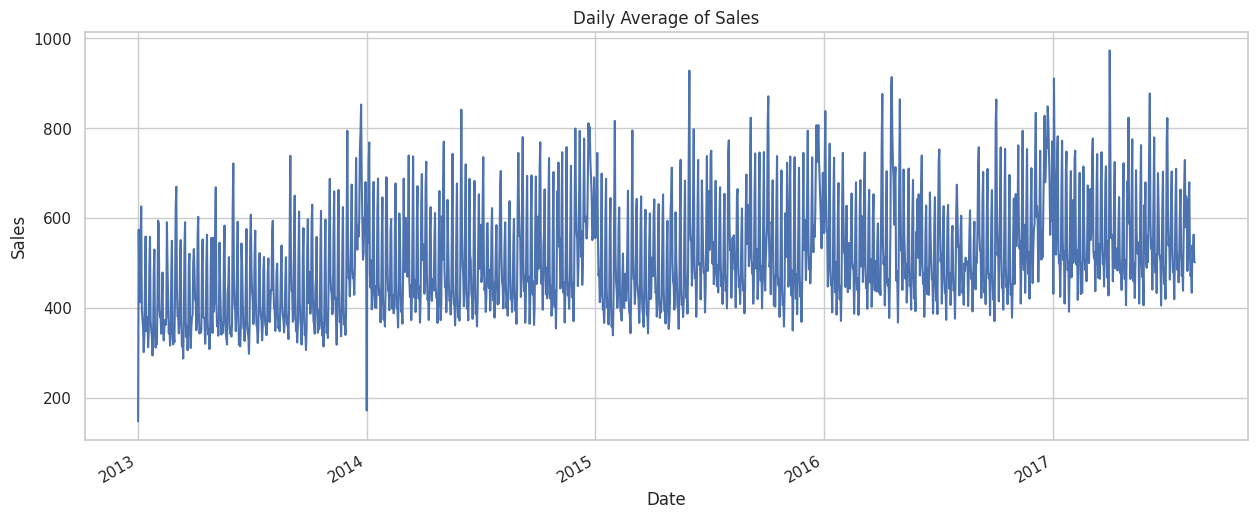

In [111]:
daily_average.plot(figsize = (15, 6))
plt.title('Daily Average of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

- 중간중간 휴업으로 인한 불규칙성을 보임
- 특히 2013, 2014년 초에 급격한 매출 저하를 보이는 구간들이 존재

## **2-2. 시계열 분해(time series decomposition)**

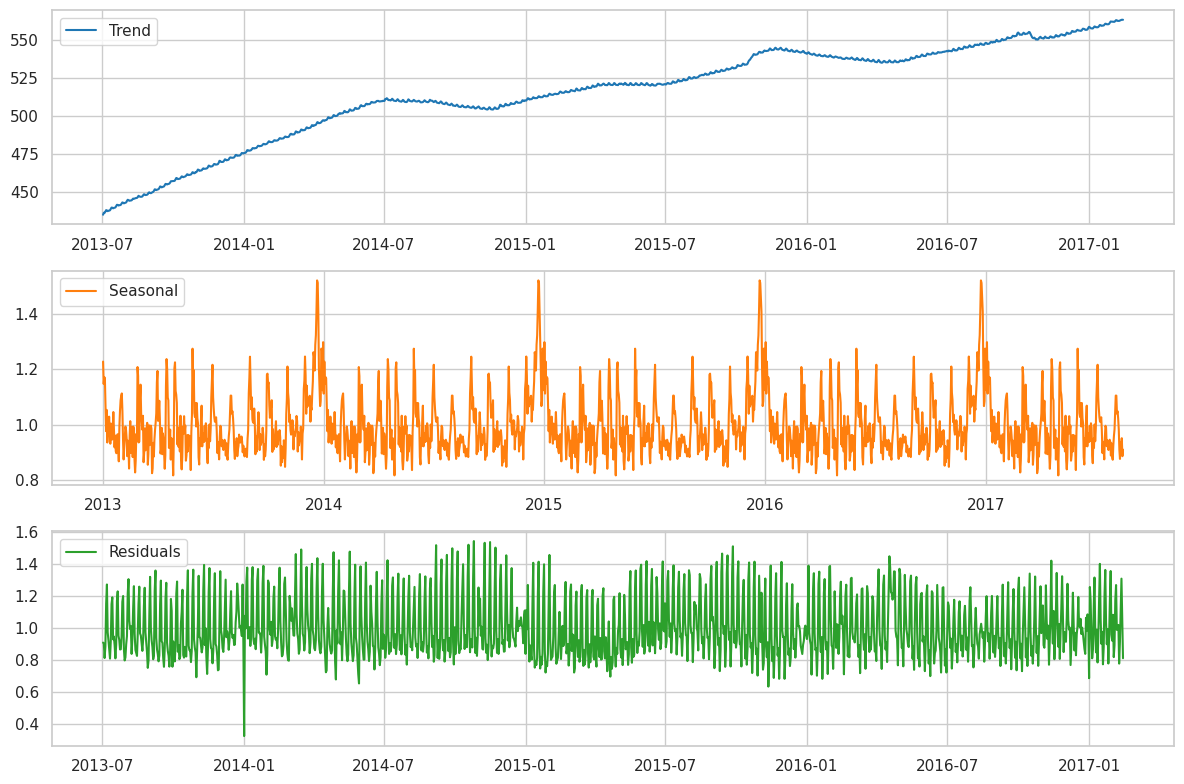

In [112]:
## 시계열 데이터 분해(연 단위로 분해)
result = sm.tsa.seasonal_decompose(daily_average, model='multiplicative', period=365)

# 색상 설정
colors = plt.cm.tab10.colors

# 시각화
plt.figure(figsize=(12, 8))

# 추세(Trend)
plt.subplot(3, 1, 1)
plt.plot(result.trend, label='Trend', color=colors[0])
plt.legend(loc='upper left')

# 계절성(Seasonality)
plt.subplot(3, 1, 2)
plt.plot(result.seasonal, label='Seasonal', color=colors[1])
plt.legend(loc='upper left')

# 잔차(Residuals) 분석
plt.subplot(3, 1, 3)
plt.plot(result.resid, label='Residuals', color=colors[2])
plt.legend(loc='upper left')

# 레이아웃 조정
plt.tight_layout()

# 시각화 표시
plt.show()

- 추세(Trend)
  - 우상향 추세를 보인다.
  > 향후에도 매출액이 증가할 것이라고 예측할 수 있다.

- 계절성(Seasonality)
  - 주로 연말(11~12월)에 매출이 증가하고 이후 감소한다.
  > 계절적 주기성이 존재한다.
  
- 잔차 분석
  - 잔차에 어떠한 패턴을 보이고 있지 않다.


## **2-3. 정상성(Stationarity)**

### **1️⃣ ACF, PACF**

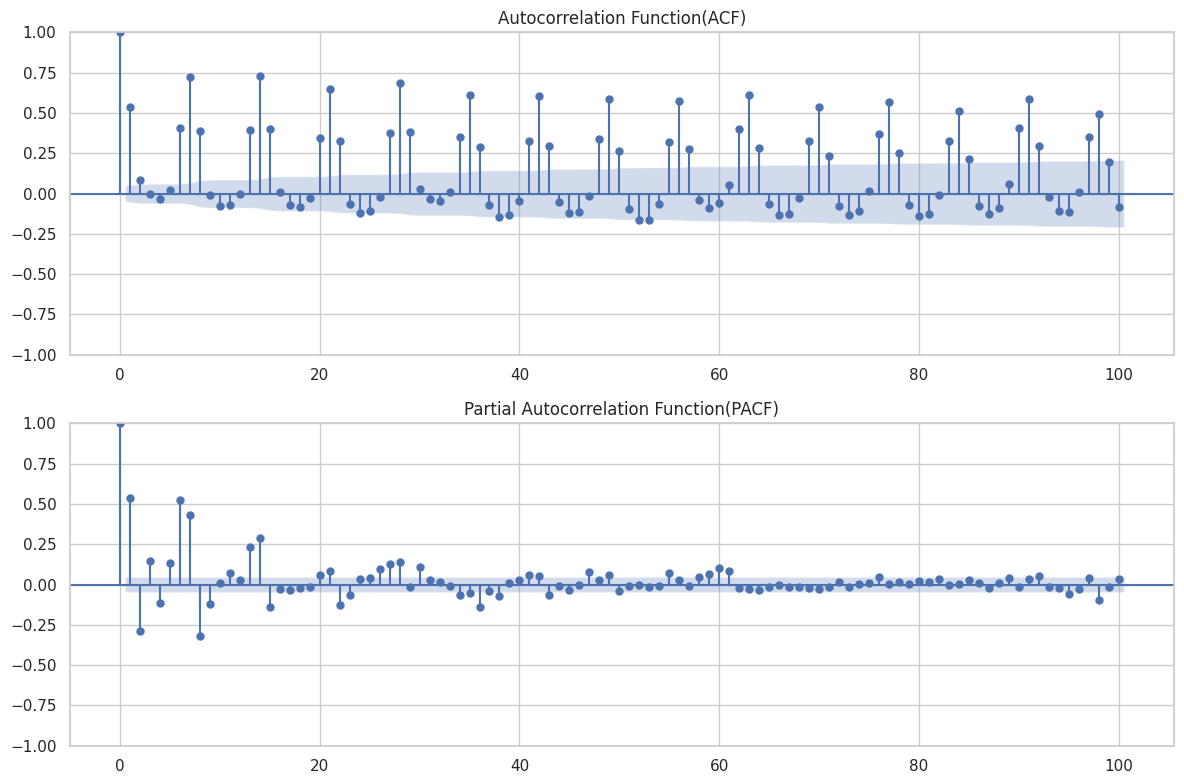

In [113]:
# ACF 및 PACF 계산 및 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF 시각화
sm.graphics.tsa.plot_acf(daily_average, lags=100, ax=axes[0])
axes[0].set_title('Autocorrelation Function(ACF)')

# PACF 시각화
sm.graphics.tsa.plot_pacf(daily_average, lags=100, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function(PACF)')

# 레이아웃 조정
plt.tight_layout()

# 시각화 표시
plt.show()

- ACF 그래프 시각화 결과 특정 패턴이 존재한다
  - 곡선의 형태를 가지며 점점 감소하는 형태

> 비정상 시계열이라고 짐작할 수 있다.

- PACF 그래프를 통해서는 별다른 특징을 파악하긴 어렵다.



### **2️⃣ ADF 검정(Augmented Dickey-Fuller Test)**
- 시계열 데이터의 안정성을 평가하는 통계적인 방법
  - 다음 가설을 검증하며, 귀무가설이 기각되면 해당 시계열은 안정적이라고 간주
    - 귀무가설(H0): 시계열 데이터는 단위근(Non-stationary)을 가진다.  
      (즉, 안정적이지 않다)
    - 대립가설(H1): 시계열 데이터는 안정적이다.

In [114]:
from statsmodels.tsa.stattools import adfuller

# ADF 검정 수행
result = adfuller(daily_average)

# 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.077050002235016
p-value: 0.001056669423237086


시계열 데이터는 안정적이다.

> 상충된 결과가 도출됨
> 시각적으로 너무나도 비정상 시계열의 특징을 띄고 있다.

**❓ 비정상성은 어떻게 해결하나?**
- 시계열 분석에서 정상성은 중요한 가정 중 하나
  - 통계적 추정의 안정성, 예측 성능 향상
- 주로 차분 등을 활용하여 정상성을 확보하고자 함

---
현재 우리는 2가지 문제점이 존재

1) 매장마다 개업 일자가 다름  
2) 중간에 휴업을 한 경우들도 존재  

> 차분의 어려움  
> 다른 파생 변수들을 통해 보완할 예정  


In [115]:
### 더 이상 일자가 연속될 필요가 없으므로 'sales'가 0인 데이터 삭제

train = train[train['sales'] != 0]

### **3️⃣ 시간 관련 변수**
- 시간적인 정보를 제공하기 위한 파생 변수들을 생성하자.

In [116]:
train['year'] = train['date'].dt.year # 연도
train['quarter'] = train['date'].dt.quarter # 분기별
train['month'] = train['date'].dt.month # 월
train['day_of_week'] = train['date'].dt.dayofweek # 요일

In [117]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,transactions,holiday,year,quarter,month,day_of_week
1427,1427,2013-01-01,25,GROCERY II,15.00,0.00,Salinas,Santa Elena,D,1,93.14,770.00,National,2013,1,1,1
1428,1428,2013-01-01,25,GROCERY I,700.00,0.00,Salinas,Santa Elena,D,1,93.14,770.00,National,2013,1,1,1
1429,1429,2013-01-01,25,FROZEN FOODS,29.65,0.00,Salinas,Santa Elena,D,1,93.14,770.00,National,2013,1,1,1
1430,1430,2013-01-01,25,DELI,71.09,0.00,Salinas,Santa Elena,D,1,93.14,770.00,National,2013,1,1,1
1431,1431,2013-01-01,25,DAIRY,143.00,0.00,Salinas,Santa Elena,D,1,93.14,770.00,National,2013,1,1,1


In [118]:
test['year'] = test['date'].dt.year # 연도
test['quarter'] = test['date'].dt.quarter # 분기별
test['month'] = test['date'].dt.month # 월
test['day_of_week'] = test['date'].dt.dayofweek # 요일

In [119]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,holiday,year,quarter,month,day_of_week
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,Weekday,2017,3,8,2
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,Weekday,2017,3,8,2
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,Weekday,2017,3,8,2
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,Weekday,2017,3,8,2
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,Weekday,2017,3,8,2


# **3. EDA**

## **3-1. type**
- type에 따라 store은 어떻게 구분될 것일까?

In [120]:
### type에 따른 매장 수

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'store_nbr'].nunique()))

type A: 9
type B: 8
type C: 15
type D: 18
type E: 4


In [121]:
### type 별 제품군

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'family'].nunique()))

type A: 32
type B: 32
type C: 32
type D: 33
type E: 32


In [122]:
### 타입별 주

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'state'].unique()))

type A: ['Pichincha' 'Guayas' 'Tungurahua' 'Manabi']
type B: ['Guayas' 'Azuay' 'Pichincha' 'Los Rios' 'Santo Domingo de los Tsachilas']
type C: ['El Oro' 'Guayas' 'Manabi' 'Pichincha' 'Santo Domingo de los Tsachilas'
 'Imbabura' 'Bolivar' 'Cotopaxi' 'Los Rios' 'Chimborazo' 'Pastaza']
type D: ['Santa Elena' 'El Oro' 'Pichincha' 'Azuay' 'Loja'
 'Santo Domingo de los Tsachilas' 'Tungurahua' 'Guayas' 'Manabi']
type E: ['Esmeraldas' 'Guayas']


In [123]:
### 타입별 도시

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'city'].unique()))

type A: ['Quito' 'Guayaquil' 'Ambato' 'Manta']
type B: ['Guayaquil' 'Cuenca' 'Quito' 'Cayambe' 'Babahoyo' 'Santo Domingo']
type C: ['Machala' 'Playas' 'El Carmen' 'Quito' 'Santo Domingo' 'Ibarra'
 'Guaranda' 'Latacunga' 'Quevedo' 'Riobamba' 'Guayaquil' 'Puyo']
type D: ['Salinas' 'Machala' 'Quito' 'Cuenca' 'Loja' 'Santo Domingo' 'Ambato'
 'Guayaquil' 'Daule' 'Manta']
type E: ['Esmeraldas' 'Guayaquil' 'Libertad']


In [124]:
### 타입별 cluster

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'cluster'].unique()))

type A: [ 5 11 14 17]
type B: [ 6 16 10]
type C: [ 3 12 15  7]
type D: [ 1  4  9  2 13  8 10]
type E: [10]


## **3-2. cluster**

In [125]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'store_nbr'].nunique()))

cluster 1: 3
cluster 2: 2
cluster 3: 7
cluster 4: 3
cluster 5: 1
cluster 6: 6
cluster 7: 2
cluster 8: 3
cluster 9: 2
cluster 10: 6
cluster 11: 3
cluster 12: 1
cluster 13: 4
cluster 14: 4
cluster 15: 5
cluster 16: 1
cluster 17: 1


In [126]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'family'].nunique()))

cluster 1: 33
cluster 2: 33
cluster 3: 32
cluster 4: 33
cluster 5: 32
cluster 6: 32
cluster 7: 32
cluster 8: 33
cluster 9: 33
cluster 10: 33
cluster 11: 32
cluster 12: 32
cluster 13: 33
cluster 14: 32
cluster 15: 32
cluster 16: 32
cluster 17: 32


In [127]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'state'].unique()))

cluster 1: ['Santa Elena' 'Guayas']
cluster 2: ['Azuay']
cluster 3: ['El Oro' 'Guayas' 'Manabi' 'Santo Domingo de los Tsachilas' 'Los Rios']
cluster 4: ['El Oro' 'Loja' 'Santo Domingo de los Tsachilas']
cluster 5: ['Pichincha']
cluster 6: ['Guayas' 'Azuay' 'Pichincha' 'Santo Domingo de los Tsachilas']
cluster 7: ['Chimborazo' 'Pastaza']
cluster 8: ['Pichincha']
cluster 9: ['Pichincha' 'Tungurahua']
cluster 10: ['Esmeraldas' 'Guayas' 'Los Rios']
cluster 11: ['Pichincha' 'Manabi']
cluster 12: ['Pichincha']
cluster 13: ['Pichincha' 'Manabi']
cluster 14: ['Pichincha' 'Tungurahua']
cluster 15: ['Imbabura' 'Bolivar' 'Pichincha' 'Cotopaxi']
cluster 16: ['Pichincha']
cluster 17: ['Guayas']


In [128]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'city'].unique()))

cluster 1: ['Salinas' 'Guayaquil' 'Daule']
cluster 2: ['Cuenca']
cluster 3: ['Machala' 'Playas' 'El Carmen' 'Santo Domingo' 'Quevedo' 'Guayaquil']
cluster 4: ['Machala' 'Loja' 'Santo Domingo']
cluster 5: ['Quito']
cluster 6: ['Guayaquil' 'Cuenca' 'Quito' 'Cayambe' 'Santo Domingo']
cluster 7: ['Riobamba' 'Puyo']
cluster 8: ['Quito']
cluster 9: ['Quito' 'Ambato']
cluster 10: ['Esmeraldas' 'Guayaquil' 'Babahoyo' 'Libertad']
cluster 11: ['Quito' 'Manta']
cluster 12: ['Quito']
cluster 13: ['Quito' 'Manta']
cluster 14: ['Quito' 'Ambato']
cluster 15: ['Ibarra' 'Guaranda' 'Quito' 'Latacunga']
cluster 16: ['Quito']
cluster 17: ['Guayaquil']


In [129]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'type'].unique()))

cluster 1: ['D']
cluster 2: ['D']
cluster 3: ['C']
cluster 4: ['D']
cluster 5: ['A']
cluster 6: ['B']
cluster 7: ['C']
cluster 8: ['D']
cluster 9: ['D']
cluster 10: ['E' 'B' 'D']
cluster 11: ['A']
cluster 12: ['C']
cluster 13: ['D']
cluster 14: ['A']
cluster 15: ['C']
cluster 16: ['B']
cluster 17: ['A']


- `type`과 `cluster` 변수는 서로를 구분하는 데 중요한 역할을 하는 것으로 확인된다.

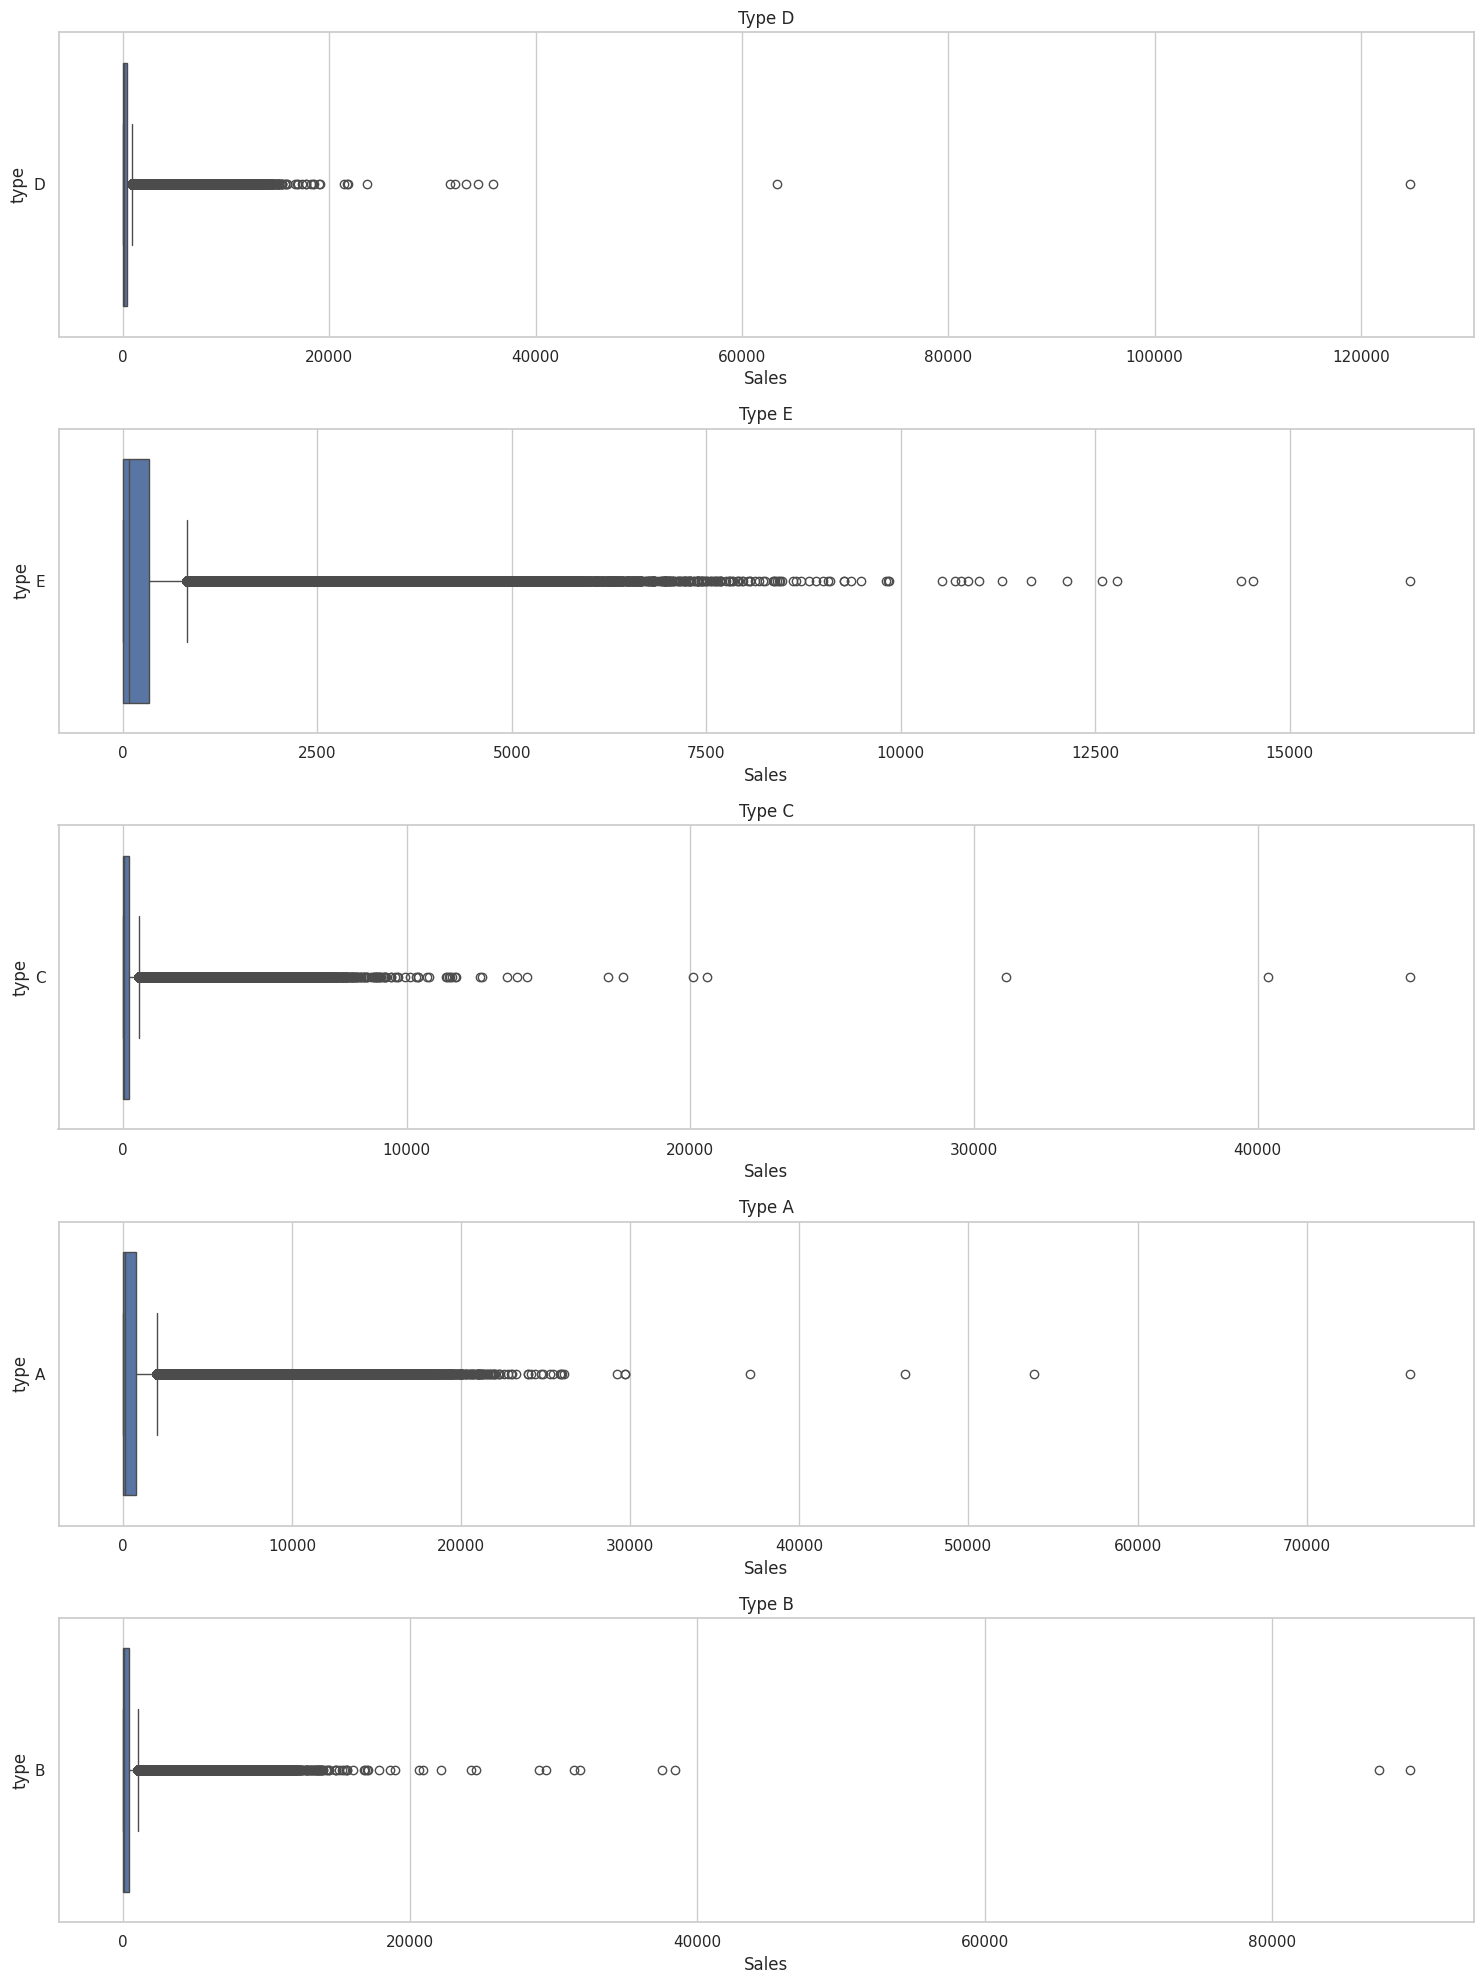

In [130]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))

# 각 type에 대한 상자 수염 그림을 해당 서브플롯에 그림
types = train['type'].unique()
for i, ax in enumerate(axes.flatten()):
    if i < len(types):
        sns.boxplot(x='sales', y='type', data=train[train['type'] == types[i]], ax=ax)
        ax.set_title(f'Type {types[i]}')
        ax.set(xlabel='Sales')

# 서브플롯 간의 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

- 매장 type별로 매출액에 큰 차이가 있음을 확인할 수 있다.
  - `type`에 따라 각각 다른 모델을 구축하기로 함

In [131]:
### 데이터를 type 별로 분리

typeA = train.loc[train['type'] == 'A', :]
typeB = train.loc[train['type'] == 'B', :]
typeC = train.loc[train['type'] == 'C', :]
typeD = train.loc[train['type'] == 'D', :]
typeE = train.loc[train['type'] == 'E', :]

In [132]:
### 데이터를 type 별로 분리

typeA_te = test.loc[test['type'] == 'A', :]
typeB_te = test.loc[test['type'] == 'B', :]
typeC_te = test.loc[test['type'] == 'C', :]
typeD_te = test.loc[test['type'] == 'D', :]
typeE_te = test.loc[test['type'] == 'E', :]

# **4. EDA(2)**
- type별로 분리하여 모델링을 진행해 보자.

## **4-3. Type C**

In [133]:
typeC = typeC.drop('type', axis = 1) # 더 이상 type 변수는 필요 없으므로 삭제
typeC_te = typeC_te.drop('type', axis = 1) # 더 이상 type 변수는 필요 없으므로 삭제

In [134]:
typeC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533821 entries, 1493 to 2704976
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            533821 non-null  int64         
 1   date          533821 non-null  datetime64[ns]
 2   store_nbr     533821 non-null  int64         
 3   family        533821 non-null  object        
 4   sales         533821 non-null  float64       
 5   onpromotion   533821 non-null  float64       
 6   city          533821 non-null  object        
 7   state         533821 non-null  object        
 8   cluster       533821 non-null  int64         
 9   dcoilwtico    533821 non-null  float64       
 10  transactions  532882 non-null  float64       
 11  holiday       533821 non-null  object        
 12  year          533821 non-null  int64         
 13  quarter       533821 non-null  int64         
 14  month         533821 non-null  int64         
 15  day_of_week  

In [135]:
# 수치형 변수들의 기초통계량 확인

typeC[['sales', 'onpromotion', 'dcoilwtico', 'transactions']].describe()

,sales,onpromotion,dcoilwtico,transactions
count,533821.00,533821.00,533821.00,532882.00
mean,308.03,3.26,64.16,1039.94
std,702.54,11.81,24.80,315.46
min,0.78,0.00,26.19,97.00
25%,6.00,0.00,45.84,771.00
50%,58.96,0.00,51.41,1026.00
75%,233.00,1.00,93.60,1262.00
max,45361.00,591.00,110.62,3176.00


- target 변수인 `sales`는 왜곡된 분포를 보이고 있다.
  - `np.log1p()`를 통한 로그 변환 수행 후 모델링하면 좋을 듯하다.

### **🧡 store_nbr**

In [136]:
# 고유한 매장 수

typeC['store_nbr'].unique()

array([40, 35, 54, 17, 16, 15, 19, 10, 12, 33, 14, 13, 30, 32, 22])

In [137]:
### 각 매장별 매출 총액 시도표(일 단위)

a = typeC.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
px.line(a, x = "date", y= "sales", color = "store_nbr", title = "Daily total sales of the stores_Type C")

- 각 매장마다 매출이 상이한 것을 확인할 수 있다.
- 17번 매장의 경우 매출액이 다른 매장에 비해 큰 것을 확인할 수 있다.
- 32번 매장의 경우 매출액이 다른 매장에 비해 작은 것을 확인할 수 있다.
> 모델링 시 매장 번호를 one-hot encoding 후 반영하는 것이 좋을 것이라고 판단됨

- 가게별로 매출에 이상치가 존재하는 것을 확인할 수 있다.
  - Kaggle 설명에 따르면 지진의 영향이라고 함
  - 그러나 test 예측 시점에는 지진에 대한 정보를 전혀 알 수 x
  > 이상치 제거 진행

#### **📌 이상치 제거**

In [138]:
typeC.shape

(533821, 16)

원래는 533821건의 데이터

In [139]:
typeC.groupby(['store_nbr', 'family'])['sales'].describe()

count   mean    std    min    25%  \
store_nbr family                                                           
10        AUTOMOTIVE                 1485.00   3.50   2.56   1.00   2.00   
          BABY CARE                   165.00   2.79   2.54   1.00   1.00   
          BEAUTY                     1145.00   2.02   1.27   1.00   1.00   
          BEVERAGES                  1679.00 897.76 413.62 164.00 544.50   
          BREAD/BAKERY               1679.00 114.01  36.60  40.00  88.00   
...                                      ...    ...    ...    ...    ...   
54        POULTRY                    1678.00  52.97  26.39   2.80  36.16   
          PREPARED FOODS             1679.00  61.40  28.35   1.00  41.00   
          PRODUCE                    1016.00 586.79 176.05 118.86 464.63   
          SCHOOL AND OFFICE SUPPLIES  162.00   6.31   7.47   1.00   1.00   
          SEAFOOD                    1019.00   2.88   2.27   1.00   1.00   

                                        50%     75%     max  
store_nbr family                                             
10        AUTOMOTIVE                   3.00    5.00   29.00  
          BABY CARE                    2.00    4.00   21.00  
          BEAUTY                       2.00    3.00   11.00  
          BEVERAGES                  860.00 1166.00 2687.00  
          BREAD/BAKERY               109.00  135.00  389.00  
...                                     ...     ...     ...  
54        POULTRY                     49.31   64.84  353.71  
          PREPARED FOODS              60.00   80.00  179.00  
          PRODUCE                    558.64  697.27 1693.63  
          SCHOOL AND OFFICE SUPPLIES   3.00    9.00   51.00  
          SEAFOOD                      2.00    4.00   24.00  

[470 rows x 8 columns]

값 자체도 왜곡된 분포를 보임을 확인할 수 있음

In [141]:
### 이상치 탐지 함수

def get_outlier_indices(df_col, weight=3):
  q1, q3 = np.percentile(df_col, [25, 75])

  iqr = q3 - q1
  iqr_weight = iqr * weight # iqr의 1.5배 범위를 벗어나는 것을 이상치로 처리

  lowest_val, highest_val = q1 - iqr_weight, q3 + iqr_weight # 상한, 하한

  outlier_indices = df_col[(df_col < lowest_val) | (df_col > highest_val)].index # 이상치에 해당하는 데이터 idx

  return outlier_indices

In [142]:
cols = ['store_nbr', 'family']

# 제거할 행(row)의 인덱스를 저장
rows_to_drop = []

for col in cols:
    # 'store_nbr', 'family'을 기준으로 데이터를 그룹화
    grouped = typeC.groupby(cols)
    # 각 그룹에 대해 이상치를 찾아내고 인덱스를 추가
    for (_, group_data) in grouped:
        outlier_indices = get_outlier_indices(group_data['sales'], weight=3)
        rows_to_drop.extend(outlier_indices)

# 이상치 제거
typeC = typeC.drop(rows_to_drop)

In [143]:
typeC.shape

(528567, 16)

528567건으로 데이터가 감소

In [144]:
typeC.groupby(['store_nbr', 'family'])['sales'].describe()

count   mean    std    min    25%  \
store_nbr family                                                           
10        AUTOMOTIVE                 1477.00   3.41   2.26   1.00   2.00   
          BABY CARE                   164.00   2.68   2.11   1.00   1.00   
          BEAUTY                     1143.00   2.00   1.22   1.00   1.00   
          BEVERAGES                  1679.00 897.76 413.62 164.00 544.50   
          BREAD/BAKERY               1673.00 113.24  34.25  40.00  88.00   
...                                      ...    ...    ...    ...    ...   
54        POULTRY                    1664.00  51.68  21.91   2.80  36.05   
          PREPARED FOODS             1679.00  61.40  28.35   1.00  41.00   
          PRODUCE                    1014.00 584.86 170.68 118.86 463.63   
          SCHOOL AND OFFICE SUPPLIES  161.00   6.04   6.60   1.00   1.00   
          SEAFOOD                    1017.00   2.85   2.15   1.00   1.00   

                                        50%     75%     max  
store_nbr family                                             
10        AUTOMOTIVE                   3.00    5.00   14.00  
          BABY CARE                    2.00    4.00   12.00  
          BEAUTY                       2.00    3.00    9.00  
          BEVERAGES                  860.00 1166.00 2687.00  
          BREAD/BAKERY               109.00  134.00  271.00  
...                                     ...     ...     ...  
54        POULTRY                     49.11   64.21  146.36  
          PREPARED FOODS              60.00   80.00  179.00  
          PRODUCE                    558.16  696.42 1360.18  
          SCHOOL AND OFFICE SUPPLIES   3.00    9.00   33.00  
          SEAFOOD                      2.00    4.00   13.00  

[470 rows x 8 columns]

In [145]:
a = typeC.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
px.line(a, x = "date", y= "sales", color = "store_nbr", title = "Daily total sales of the stores_Type C")

이상치가 어느정도는 제거된 것 같다.

### **💛 family**

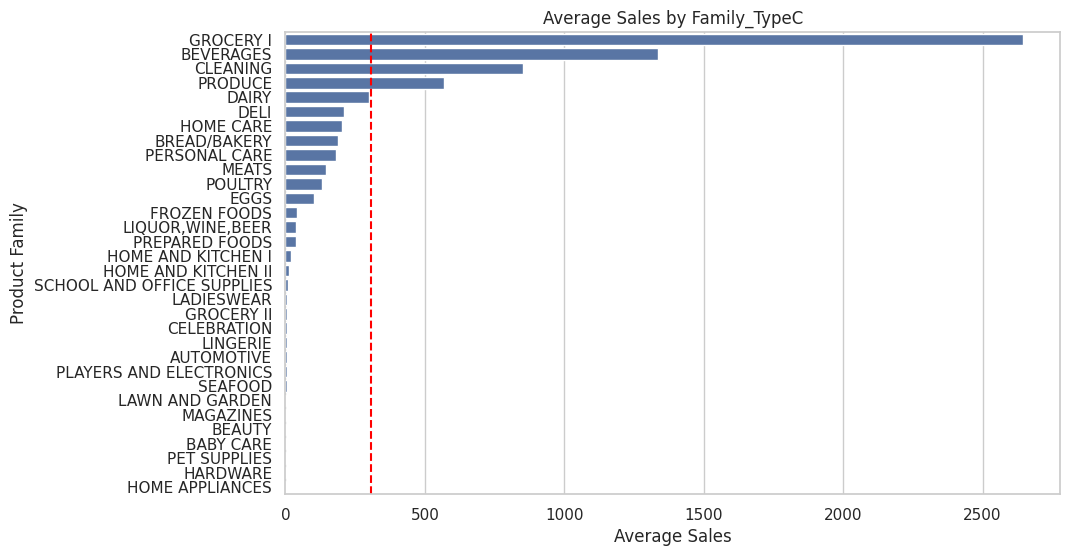

In [146]:
### 각 품목별로 매출에 미치는 영향

# 각 family 별로 'sales'의 평균을 계산하고, 내림차순으로 정렬
average_sales_by_family = typeC.groupby('family')['sales'].mean().sort_values(ascending=False)

## 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='family', data=typeC, order=average_sales_by_family.index, ci=None)
plt.axvline(x=typeC['sales'].mean(), color='red', linestyle='--') # 매출 전체 평균

# 그래프 제목 및 레이블 설정
plt.title('Average Sales by Family_TypeC')
plt.xlabel('Average Sales')
plt.ylabel('Product Family')
plt.show()

- groceryI과 beverage, CLEANING가 매출의 대부분을 차지한다.
> 모델링 시 제품군을 one-hot encoding 후 반영하는 것이 좋을 것이라고 판단됨

### **💚 onpromotion**

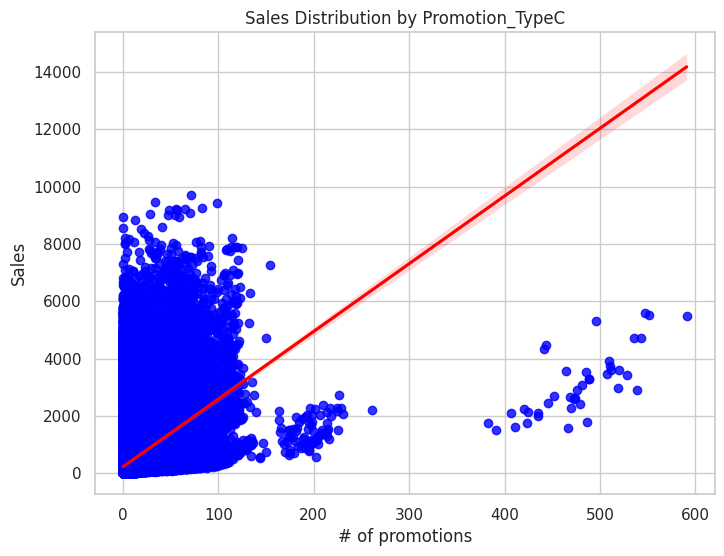

In [147]:
plt.figure(figsize=(8, 6))

sns.regplot(x='onpromotion', y='sales', data=typeC, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# 그래프 제목 및 레이블 설정
plt.title('Sales Distribution by Promotion_TypeC')
plt.xlabel('# of promotions')
plt.ylabel('Sales')
plt.show()

- 약한 양의 상관관계를 보인다.
- promotion되는 제품 수와 상관 없이 매출액이 큰 경우들이 존재함을 확인할 수 있다.

### **💙 state**

In [148]:
# 고유한 주(state) 수

typeC['state'].unique()

array(['El Oro', 'Guayas', 'Manabi', 'Pichincha',
       'Santo Domingo de los Tsachilas', 'Imbabura', 'Bolivar',
       'Cotopaxi', 'Chimborazo', 'Los Rios', 'Pastaza'], dtype=object)

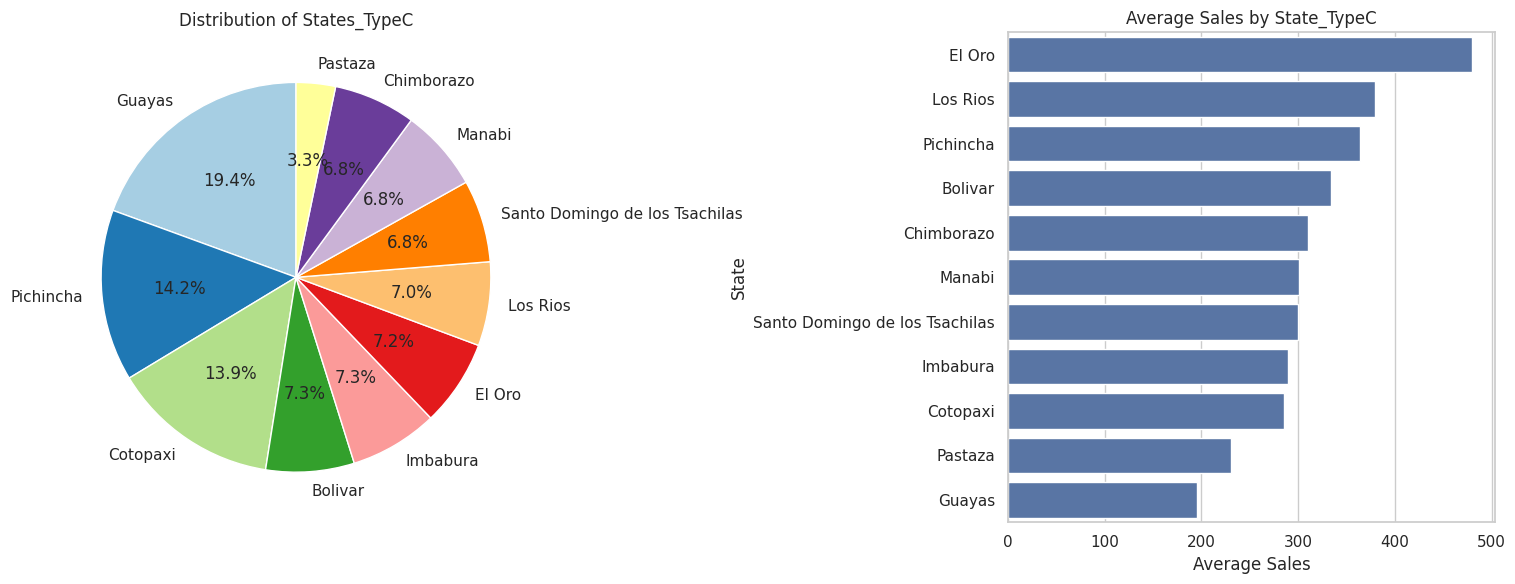

In [149]:
plt.figure(figsize=(15, 6))

# 첫 번째 subplot: 파이 차트
plt.subplot(1, 2, 1)
state_counts = typeC['state'].value_counts()
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of States_TypeC')

# 두 번째 subplot: 막대 그래프
plt.subplot(1, 2, 2)
average_sales_by_state = typeC.groupby('state')['sales'].mean().sort_values(ascending=False)
sns.barplot(x='sales', y='state', data=typeC, order=average_sales_by_state.index, ci=None)

plt.title('Average Sales by State_TypeC')
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

- 주마다 매출액에 차이가 있음을 확인할 수 있다.
- Manabi 주의 경우 데이터 건수가 7.0%로 적은 편임에도 불구하고 매출에 큰 영향을 미침을 확인할 수 있다.
* Guayas 주의 경우 데이터 건수가 19.5%를 차지하며 가장 큼에도 불구하고 평균 매출은 가장 작음을 확인할 수 있다.

### **💜 city**

In [150]:
# 고유한 도시(city) 수

print(typeC.groupby('state')['store_nbr'].unique())
print()
print(typeC.groupby('state')['city'].unique())

state
Bolivar                                   [19]
Chimborazo                                [14]
Cotopaxi                              [12, 13]
El Oro                                    [40]
Guayas                            [35, 30, 32]
Imbabura                                  [15]
Los Rios                                  [33]
Manabi                                    [54]
Pastaza                                   [22]
Pichincha                             [17, 10]
Santo Domingo de los Tsachilas            [16]
Name: store_nbr, dtype: object

state
Bolivar                                    [Guaranda]
Chimborazo                                 [Riobamba]
Cotopaxi                                  [Latacunga]
El Oro                                      [Machala]
Guayas                            [Playas, Guayaquil]
Imbabura                                     [Ibarra]
Los Rios                                    [Quevedo]
Manabi                                    [El Carmen]
Pastaza

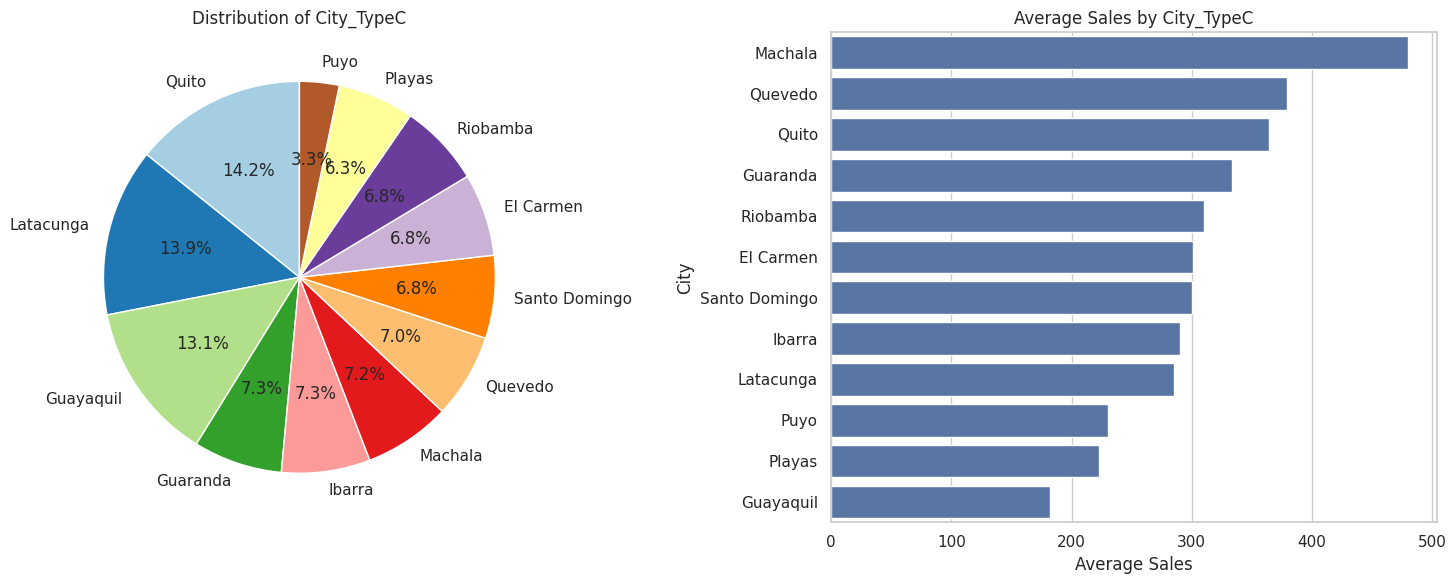

In [151]:
plt.figure(figsize=(15, 6))

# 첫 번째 subplot: 파이 차트
plt.subplot(1, 2, 1)
city_counts = typeC['city'].value_counts()
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of City_TypeC')

# 두 번째 subplot: 막대 그래프
plt.subplot(1, 2, 2)
average_sales_by_city = typeC.groupby('city')['sales'].mean().sort_values(ascending=False)
sns.barplot(x='sales', y='city', data=typeC, order=average_sales_by_city.index, ci=None)

plt.title('Average Sales by City_TypeC')
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

- `state`를 통해 `city`가 다 구분되는 상황
  - `sales`의 양상이 `state`와 유사
- typeC에서 유일하게 city 2개를 포함하고 있는 state인 Guayas  를 살펴보았을 때, 그 안의 city인 Playas, Guayaquil는 평균 매출액이 가장 낮은편으로 비슷한 경향을 가진다.
    * `state` 변수 하나만 남기기로 결정

### **🤎dcoilwtico**

In [152]:
import plotly.express as px

daily_oil_price = typeC.groupby("date")["dcoilwtico"].mean().reset_index()

# 그래프 그리기
fig = px.line(daily_oil_price, x="date", y="dcoilwtico", title="Daily DcoilWTICO Prices")
fig.show()

- 유가 변동 경향과 sales의 변동이 별 상관은 없어 보인다.(추세가 다름)
- 2014년을 기점으로 급격하게 감소하는 추세를 보인다.
  - 그에 비해 매출은 그렇게 오르지 않았다.

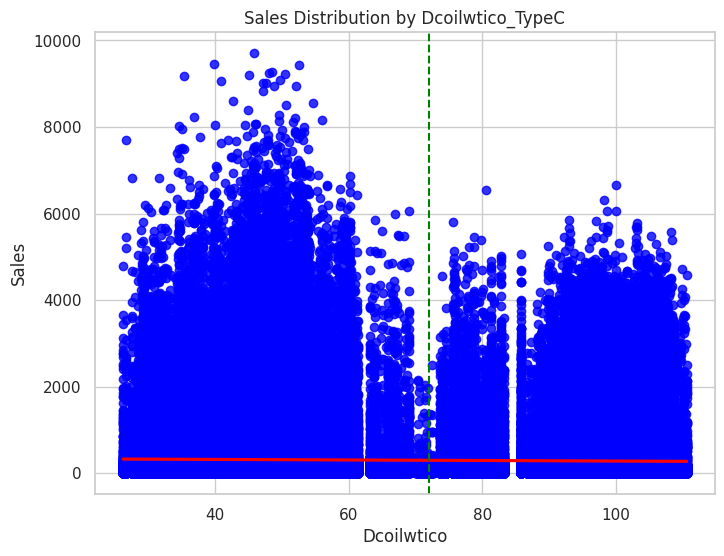

In [153]:
plt.figure(figsize=(8, 6))

sns.regplot(x='dcoilwtico', y='sales', data=typeC, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.axvline(x=72, color='green', linestyle='--') # 72 구분선

# 그래프 제목 및 레이블 설정
plt.title('Sales Distribution by Dcoilwtico_TypeC')
plt.xlabel('Dcoilwtico')
plt.ylabel('Sales')
plt.show()

- 정말 별 상관은 없어 보인다.
- 다만 유가가 **72** 전후에서 두 개의 그룹으로 확연히 분리되는 것을 확인할 수 있다.

In [154]:
under72 = typeC.loc[typeC['dcoilwtico'] <= 72,:]
over72 = typeC.loc[typeC['dcoilwtico'] > 72,:]

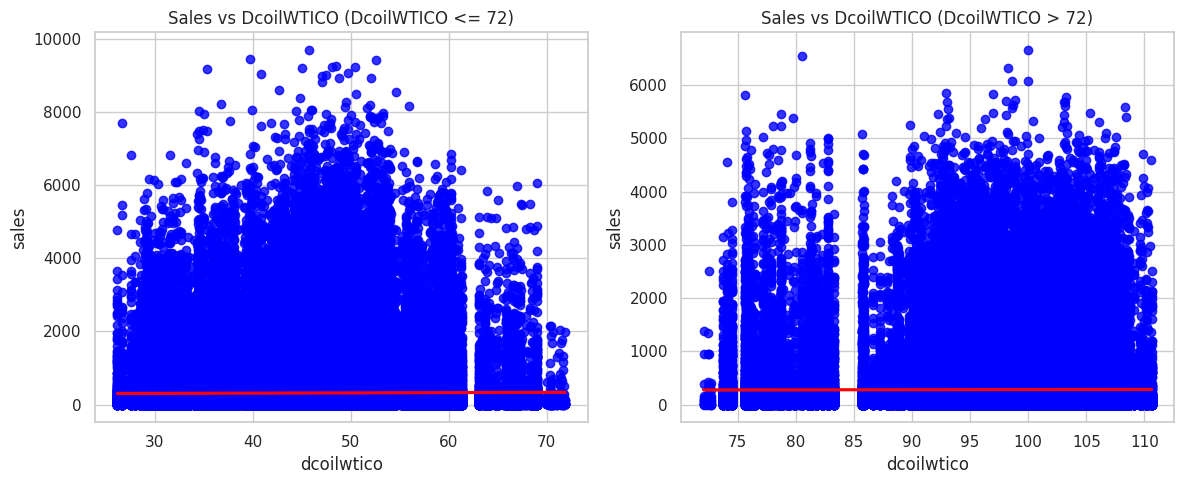

In [155]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot regplot for 'dcoilwtico' <= 72
sns.regplot(x='dcoilwtico', y='sales', data=under72, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Sales vs DcoilWTICO (DcoilWTICO <= 72)')

# Plot regplot for 'dcoilwtico' > 72
sns.regplot(x='dcoilwtico', y='sales', data=over72, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Sales vs DcoilWTICO (DcoilWTICO > 72)')

# Adjust layout
plt.tight_layout()
plt.show()

- 차이가 나타나진 않는다..

### **💗 transactions**

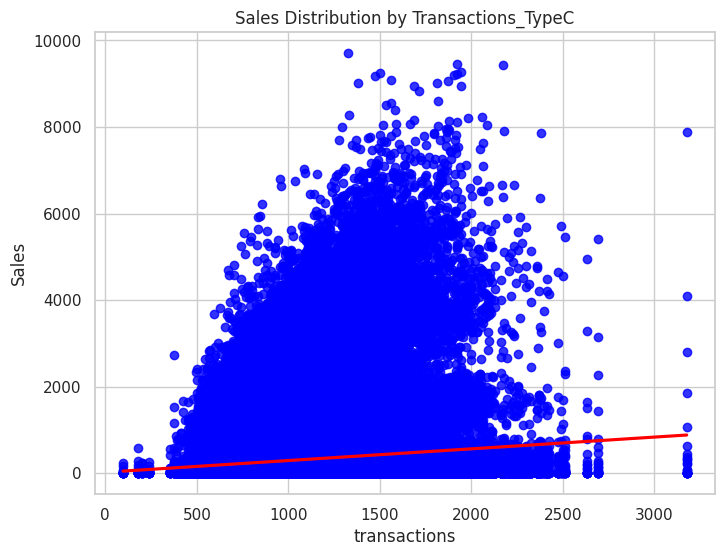

In [156]:
plt.figure(figsize=(8, 6))

sns.regplot(x='transactions', y='sales', data=typeC, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# 그래프 제목 및 레이블 설정
plt.title('Sales Distribution by Transactions_TypeC')
plt.xlabel('transactions')
plt.ylabel('Sales')
plt.show()

- 약한 양의 상관관계를 보인다.
- 그닥 상관은 없어 보인다.  
(어짜피 모델링 시 활용하기 어려움..)

### **🤍 holiday**

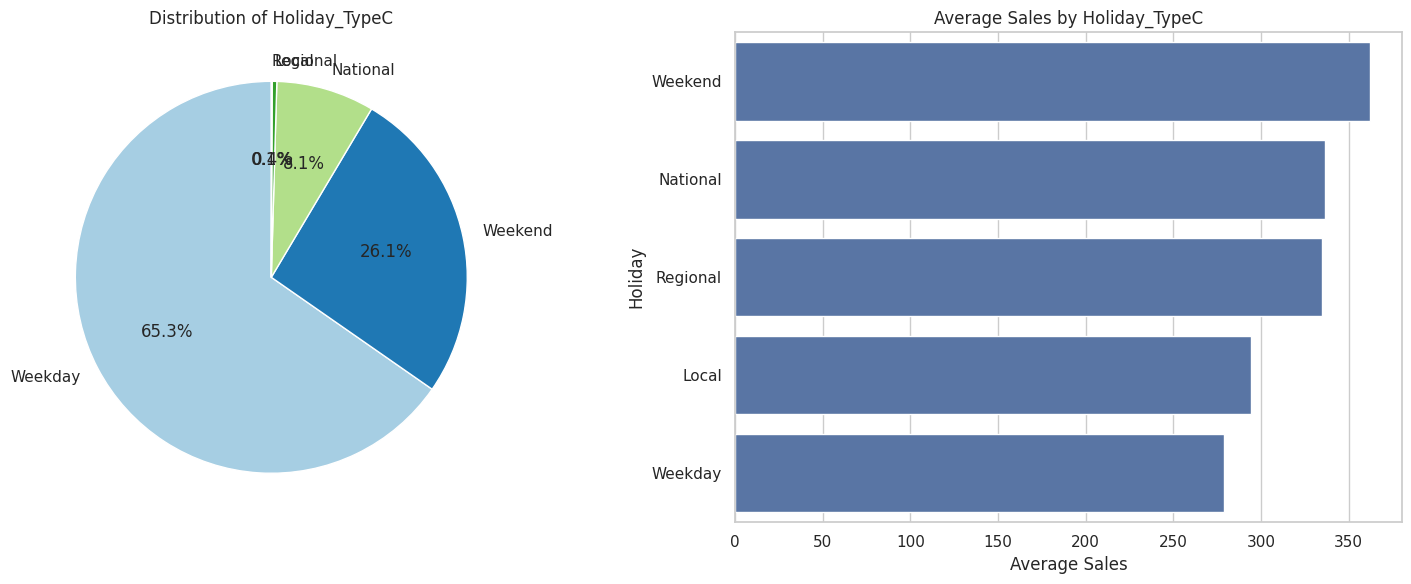

In [157]:
plt.figure(figsize=(15, 6))

# 첫 번째 subplot: 파이 차트
plt.subplot(1, 2, 1)
holiday_counts = typeC['holiday'].value_counts()
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Holiday_TypeC')

# 두 번째 subplot: 막대 그래프
plt.subplot(1, 2, 2)
average_sales_by_holiday = typeC.groupby('holiday')['sales'].mean().sort_values(ascending=False)
sns.barplot(x='sales', y='holiday', data=typeC, order=average_sales_by_holiday.index, ci=None)

plt.title('Average Sales by Holiday_TypeC')
plt.xlabel('Average Sales')
plt.ylabel('Holiday')
plt.tight_layout()
plt.show()

- 그냥 주말(공휴일은 제외됨)에 매출이 가장 좋다.

### **⭐Target 변수(Sales)**
- 여러 요인에 따라 매출이 어떻게 달라지는지 살펴보자.

#### **a) 시간 관련 변수**

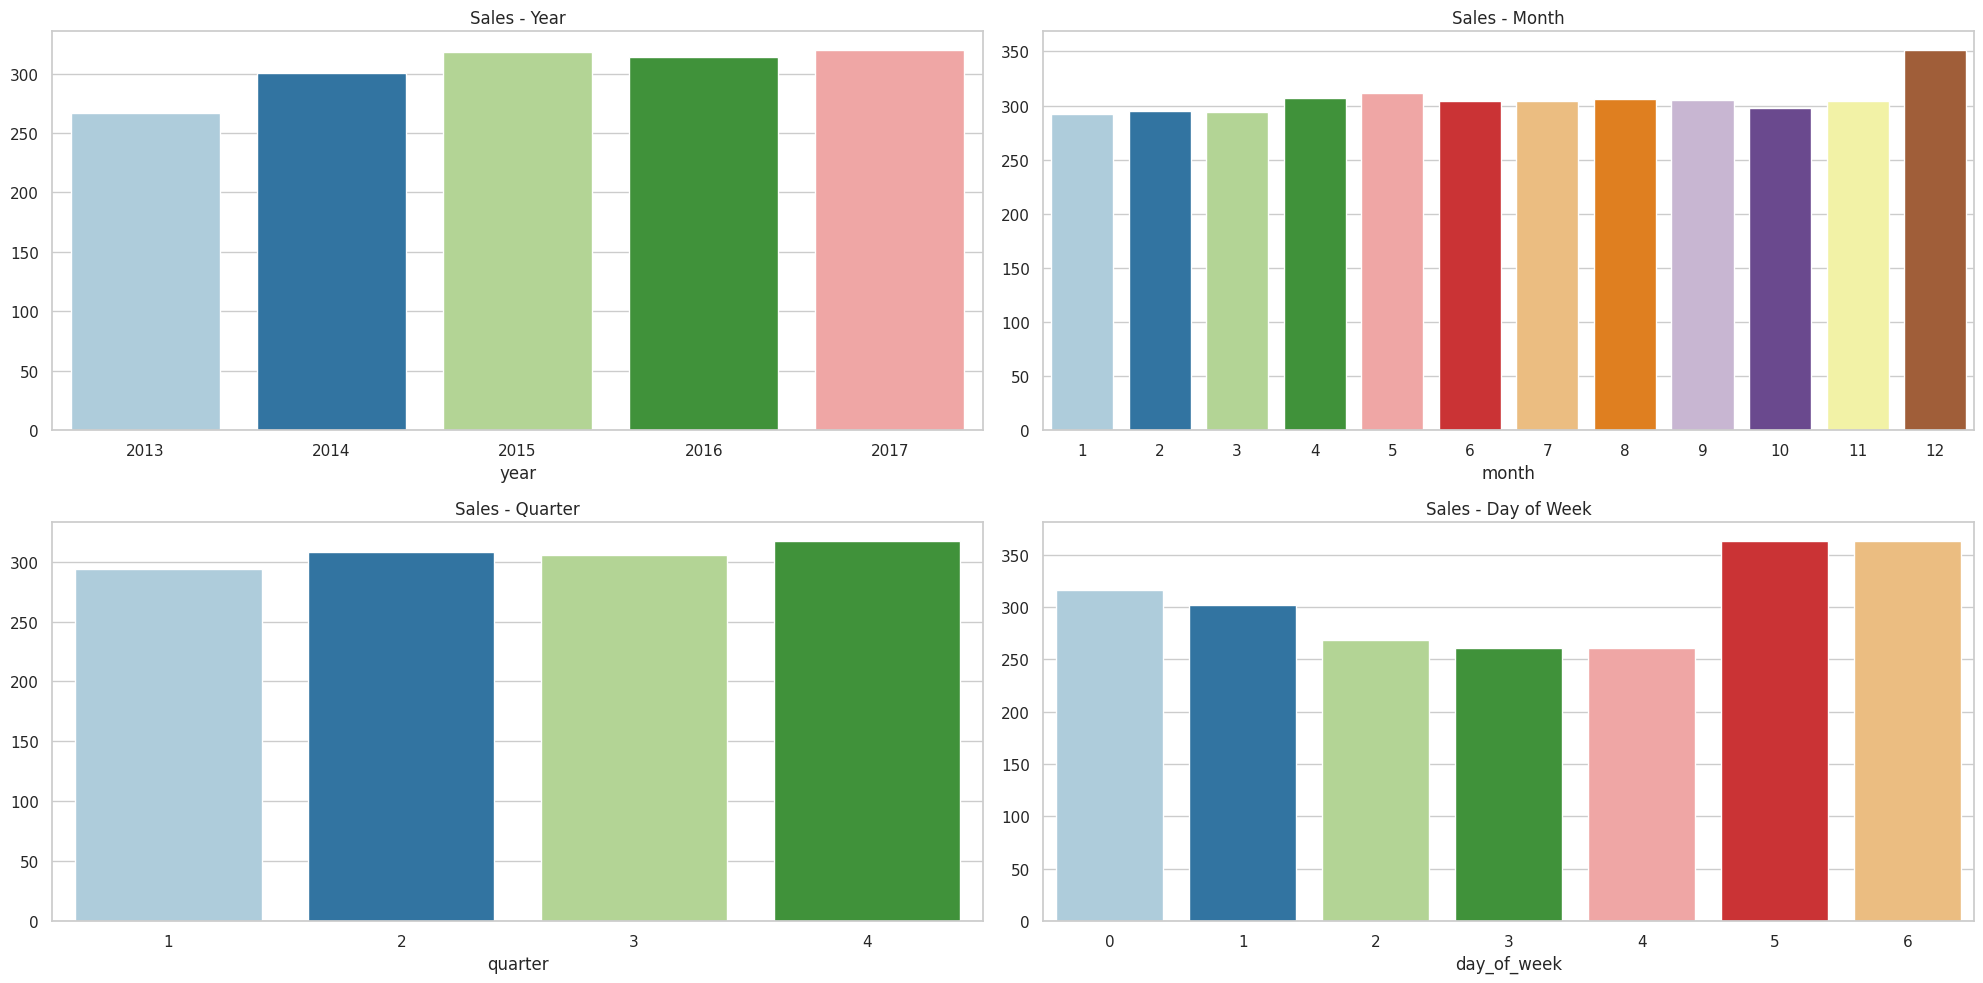

In [158]:
### 평균 매출액으로 시각화
data_grouped_year = typeC.groupby(['year']).mean()['sales']
data_grouped_month = typeC.groupby(['month']).mean()['sales']
data_grouped_quarter = typeC.groupby(['quarter']).mean()['sales']
data_grouped_day = typeC.groupby(['day_of_week']).mean()['sales']

palette = sns.color_palette("Paired")

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# 연도별 매출
axes[0, 0].set_title('Sales - Year')
sns.barplot(x=data_grouped_year.index, y=data_grouped_year.values, ax=axes[0, 0], palette=palette)
# 월별 매출
axes[0, 1].set_title('Sales - Month')
sns.barplot(x=data_grouped_month.index, y=data_grouped_month.values, ax=axes[0, 1], palette=palette)
# 분기별 매출
axes[1, 0].set_title('Sales - Quarter')
sns.barplot(x=data_grouped_quarter.index, y=data_grouped_quarter.values, ax=axes[1, 0], palette=palette)
# 요일별 매출
axes[1, 1].set_title('Sales - Day of Week')
sns.barplot(x=data_grouped_day.index, y=data_grouped_day.values, ax=axes[1, 1], palette=palette)

plt.tight_layout()
plt.show()

**연도별 매출**
- 뒤로 갈수록 매출액이 점점 증가하고 있다.

**월별 & 분기별 매출**  
- 대체로 비슷한 경향을 보이나, 12월에 매출이 증가
- 4분기에 매출이 약간 증가

**요일별 매출**  
- 평일에 비해 주말의 매출액이 더 높다.
- 평일 중에서는 수, 목, 금의 매출이 가장 낮다.

#### **b) 변수들 간의 상관관계**
- 상관계수는 수치형 변수들끼리만 비교 가능

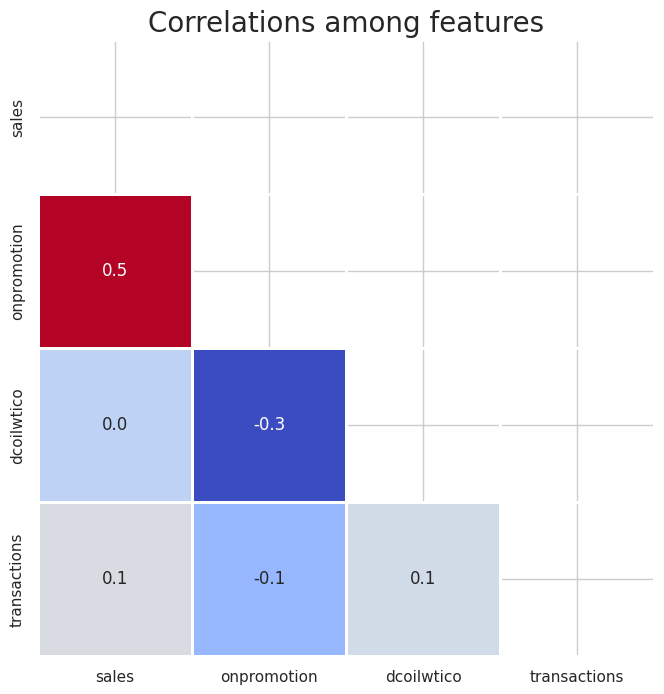

In [159]:
num_ftrs = typeC[['sales', 'onpromotion','dcoilwtico','transactions']]

mask = np.triu(num_ftrs.corr(method = 'spearman'))

# heatmap을 이용한 시각화
plt.figure(figsize=(8, 8))
sns.heatmap(num_ftrs.corr(method = 'spearman'),
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)
plt.title("Correlations among features", fontsize=20)
plt.show()

### **💡 후처리**

#### **최종 변수 선택**

In [160]:
typeC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528567 entries, 1493 to 2704976
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            528567 non-null  int64         
 1   date          528567 non-null  datetime64[ns]
 2   store_nbr     528567 non-null  int64         
 3   family        528567 non-null  object        
 4   sales         528567 non-null  float64       
 5   onpromotion   528567 non-null  float64       
 6   city          528567 non-null  object        
 7   state         528567 non-null  object        
 8   cluster       528567 non-null  int64         
 9   dcoilwtico    528567 non-null  float64       
 10  transactions  527642 non-null  float64       
 11  holiday       528567 non-null  object        
 12  year          528567 non-null  int64         
 13  quarter       528567 non-null  int64         
 14  month         528567 non-null  int64         
 15  day_of_week  

In [161]:
typeC = typeC[['store_nbr', 'family', 'sales', 'onpromotion', 'state', 'cluster', 'dcoilwtico', 'holiday', 'year', 'quarter', 'month', 'day_of_week']]

# test의 경우에는 이후 submission 파일 작성을 위해 일단 id를 남겨두기로 결정
typeC_te = typeC_te[['id', 'store_nbr', 'family', 'onpromotion', 'state', 'cluster', 'dcoilwtico', 'holiday', 'year', 'quarter', 'month', 'day_of_week']]

In [162]:
typeC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528567 entries, 1493 to 2704976
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   store_nbr    528567 non-null  int64  
 1   family       528567 non-null  object 
 2   sales        528567 non-null  float64
 3   onpromotion  528567 non-null  float64
 4   state        528567 non-null  object 
 5   cluster      528567 non-null  int64  
 6   dcoilwtico   528567 non-null  float64
 7   holiday      528567 non-null  object 
 8   year         528567 non-null  int64  
 9   quarter      528567 non-null  int64  
 10  month        528567 non-null  int64  
 11  day_of_week  528567 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 52.4+ MB


#### **Train/Validation Split**

In [163]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(typeC, test_size=0.3, random_state=42, stratify=typeC[['store_nbr', 'family']]) # 가게별 비율 유지

In [164]:
train.shape

(369996, 12)

In [165]:
val.shape

(158571, 12)

#### **변수 왜곡 정도 확인**

In [166]:
# 수치형 변수들에 대해서만 왜도 확인

num_ftrs = train[['sales', 'onpromotion','dcoilwtico']]
num_ftrs.skew()

sales         4.01
onpromotion   9.86
dcoilwtico    0.57
dtype: float64

In [167]:
train['sales'] = np.log1p(train['sales'])
train['onpromotion'] = np.log1p(train['onpromotion'])

In [168]:
train[['sales', 'onpromotion','dcoilwtico']].skew()

sales         0.10
onpromotion   2.11
dcoilwtico    0.57
dtype: float64

- 왜곡 정도가 많이 개선되었다.

In [169]:
val['onpromotion'] = np.log1p(val['onpromotion'])
typeC_te['onpromotion'] = np.log1p(typeC_te['onpromotion'])

#### **스케일링**
- 수치형 변수들에 대한 스케일링 진행

In [170]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected variables
train[['onpromotion', 'dcoilwtico']] = scaler.fit_transform(train[['onpromotion', 'dcoilwtico']])
val[['onpromotion', 'dcoilwtico']] = scaler.transform(val[['onpromotion', 'dcoilwtico']])
typeC_te[['onpromotion', 'dcoilwtico']] = scaler.transform(typeC_te[['onpromotion', 'dcoilwtico']])

In [171]:
train.head()

,store_nbr,family,sales,onpromotion,state,cluster,dcoilwtico,holiday,year,quarter,month,day_of_week
1898710,54,MEATS,4.24,2.04,Manabi,3,-0.74,National,2016,2,4,5
849931,54,POULTRY,4.09,-0.50,Manabi,3,1.66,Weekday,2014,3,7,0
550216,10,GROCERY I,8.12,-0.50,Pichincha,15,1.18,Weekend,2014,1,1,5
583500,17,DAIRY,6.51,-0.50,Pichincha,12,1.28,Weekend,2014,1,1,6
771487,14,HARDWARE,0.69,-0.50,Chimborazo,7,1.58,Weekend,2014,2,5,5


In [172]:
val.head()

,store_nbr,family,sales,onpromotion,state,cluster,dcoilwtico,holiday,year,quarter,month,day_of_week
131484,54,BEVERAGES,497.00,-0.50,Manabi,3,1.33,Weekend,2013,1,3,6
2441321,32,PERSONAL CARE,101.00,1.67,Guayas,3,-0.64,Weekday,2017,1,3,2
2684028,32,MEATS,84.91,2.36,Guayas,3,-0.61,Weekday,2017,3,8,3
1823801,32,DELI,122.00,-0.50,Guayas,3,-0.97,Weekday,2016,1,3,3
2225602,30,AUTOMOTIVE,1.00,-0.50,Guayas,3,-0.78,Weekday,2016,4,11,1


In [173]:
typeC_te.head()

,id,store_nbr,family,onpromotion,state,cluster,dcoilwtico,holiday,year,quarter,month,day_of_week
33,3000921,10,AUTOMOTIVE,-0.50,Pichincha,15,-0.70,Weekday,2017,3,8,2
34,3000922,10,BABY CARE,-0.50,Pichincha,15,-0.70,Weekday,2017,3,8,2
35,3000923,10,BEAUTY,0.59,Pichincha,15,-0.70,Weekday,2017,3,8,2
36,3000924,10,BEVERAGES,3.24,Pichincha,15,-0.70,Weekday,2017,3,8,2
37,3000925,10,BOOKS,-0.50,Pichincha,15,-0.70,Weekday,2017,3,8,2


#### **범주형 변수 처리**

In [174]:
train  = pd.get_dummies(train , columns=['store_nbr','family', 'state', 'cluster', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
train .head()

,sales,onpromotion,dcoilwtico,store_nbr_10,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_19,store_nbr_22,store_nbr_30,store_nbr_32,store_nbr_33,store_nbr_35,store_nbr_40,store_nbr_54,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Guayas,state_Imbabura,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santo Domingo de los Tsachilas,cluster_3,cluster_7,cluster_12,cluster_15,holiday_Local,holiday_National,holiday_Regional,holiday_Weekday,holiday_Weekend,year_2013,year_2014,year_2015,year_2016,year_2017,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
1898710,4.24,2.04,-0.74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
849931,4.09,-0.50,1.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
550216,8.12,-0.50,1.18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
583500,6.51,-0.50,1.28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
771487,0.69,-0.50,1.58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [175]:
train.shape

(369996, 98)

In [176]:
val  = pd.get_dummies(val , columns=['store_nbr','family', 'state', 'cluster', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
val.head()

,sales,onpromotion,dcoilwtico,store_nbr_10,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_19,store_nbr_22,store_nbr_30,store_nbr_32,store_nbr_33,store_nbr_35,store_nbr_40,store_nbr_54,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Guayas,state_Imbabura,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santo Domingo de los Tsachilas,cluster_3,cluster_7,cluster_12,cluster_15,holiday_Local,holiday_National,holiday_Regional,holiday_Weekday,holiday_Weekend,year_2013,year_2014,year_2015,year_2016,year_2017,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
131484,497.00,-0.50,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2441321,101.00,1.67,-0.64,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2684028,84.91,2.36,-0.61,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1823801,122.00,-0.50,-0.97,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2225602,1.00,-0.50,-0.78,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [177]:
val.shape

(158571, 98)

- 97개의 feature 변수, 1개의 target 변수

In [178]:
typeC_te = pd.get_dummies(typeC_te, columns=['store_nbr','family', 'state', 'cluster', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
typeC_te.head()

,id,onpromotion,dcoilwtico,store_nbr_10,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_19,store_nbr_22,store_nbr_30,store_nbr_32,store_nbr_33,store_nbr_35,store_nbr_40,store_nbr_54,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Guayas,state_Imbabura,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santo Domingo de los Tsachilas,cluster_3,cluster_7,cluster_12,cluster_15,holiday_Weekday,holiday_Weekend,year_2017,quarter_3,month_8,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
33,3000921,-0.50,-0.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0
34,3000922,-0.50,-0.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0
35,3000923,0.59,-0.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0
36,3000924,3.24,-0.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0
37,3000925,-0.50,-0.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0


In [179]:
typeC_te.shape

(7920, 78)

- 차이가 나는 부분
  - holiday
  - year
  - quarter
  - month

In [180]:
## typeC_te 변수 추가
typeC_te[['holiday_Local' ,'holiday_National', 'holiday_Regional', 'year_2013',	'year_2014'	,'year_2015','year_2016','quarter_1',
          'quarter_2', 'quarter_4', 'month_1',	'month_2',	'month_3',	'month_4',	'month_5',	'month_6',	'month_7',	'month_9',
          'month_10', 'month_11', 'month_12']] = 0

In [181]:
train.shape

(369996, 98)

In [182]:
typeC_te.shape

(7920, 99)

In [183]:
train.columns.difference(typeC_te.columns)

Index(['sales'], dtype='object')

In [184]:
typeC_te.columns.difference(train.columns)

Index(['family_BOOKS', 'id'], dtype='object')

* typeC에 속하는 매장들은 해당 제품군을 판매하지 x
    * 모델링 시에는 삭제
* 이후 예측값을 다 0으로 표시

In [186]:
# 최종 파일 저장

train.to_csv('/content/drive/MyDrive/ESAA/OB/방학프로젝트/data/modeling/train/trainC.csv', index = False)
val.to_csv('/content/drive/MyDrive/ESAA/OB/방학프로젝트/data/modeling/val/valC.csv', index = False)
typeC_te.to_csv('/content/drive/MyDrive/ESAA/OB/방학프로젝트/data/modeling/test/testC.csv', index = False)